In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
# Total nbr of customers that are interested in a vehicle insurance
df_pos = df[df['Response']==1]

In [4]:
# What is the most frequent communication medium of customers interested in an insurance?
df_pos['Policy_Sales_Channel'].value_counts(normalize=True)

26.0     0.340206
124.0    0.299636
152.0    0.082595
156.0    0.049176
157.0    0.038407
           ...   
63.0     0.000021
97.0     0.000021
69.0     0.000021
39.0     0.000021
43.0     0.000021
Name: Policy_Sales_Channel, Length: 121, dtype: float64

In [5]:
# What is the most frequent communication medium with customers?
df['Policy_Sales_Channel'].value_counts(normalize=True)

152.0    0.353663
26.0     0.209127
124.0    0.194157
160.0    0.057146
156.0    0.027974
           ...   
144.0    0.000003
149.0    0.000003
84.0     0.000003
143.0    0.000003
43.0     0.000003
Name: Policy_Sales_Channel, Length: 155, dtype: float64

In [6]:
# Are there any communication channels that are more successful in convincing customers?

### NOTE: This works as above expression because the variable 'Response'= 0 or 1. ###
df_channels = df.groupby(['Policy_Sales_Channel']).mean()['Response'].sort_values(ascending=False).reset_index(name='frequency')

# OR:
#df_channels = (df_pos['Policy_Sales_Channel'].value_counts()/df['Policy_Sales_Channel'].value_counts()).sort_values(ascending=False).reset_index(name='frequency')

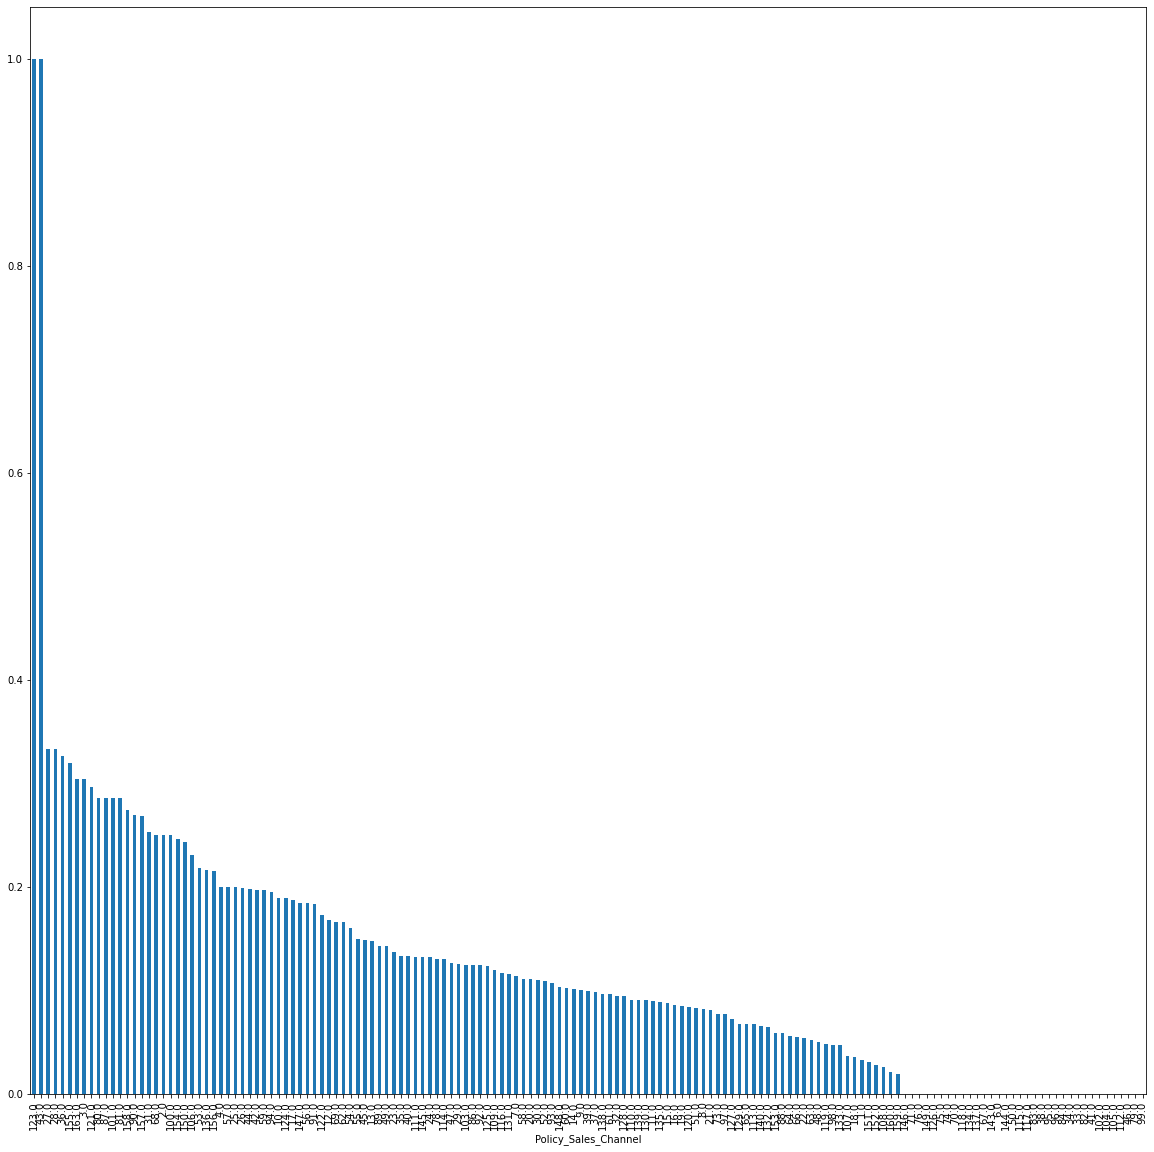

In [7]:
df.groupby(['Policy_Sales_Channel']).mean()['Response'].sort_values(ascending=False).plot(kind='bar',figsize=(20,20));

In [8]:
# Top 10 of channels
df_channels5 = df_channels[:10]

# Others (the mean of all the rest)
df_channelsOther = df_channels[10:].mean()

# Array for pie chart
df_channelsPie = df_channels5.append(df_channelsOther,ignore_index=True)
df_channelsPie['Policy_Sales_Channel'][10] = 'Other'
df_channelsPie

,Policy_Sales_Channel,frequency
0,123,1.000000
1,43,1.000000
2,27,0.333333
3,28,0.333333
4,36,0.326923
5,155,0.320097
6,163,0.304183
7,3,0.304015
8,121,0.296875
9,80,0.285714


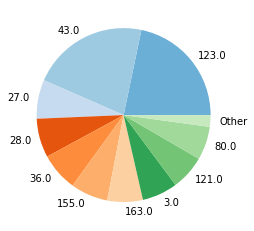

In [9]:
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]))

plt.pie(df_channelsPie['frequency'], labels=df_channelsPie['Policy_Sales_Channel'], colors=colors);
#plt.savefig('channels.png',dpi=400)